In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [23]:
# Load the dataset
file_path = '/content/drive/MyDrive/projects/dataset/traffic.csv'
df = pd.read_csv(file_path)
df.head(10)

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0
5,01-06-2020,3704.0
6,01-07-2020,3760.0
7,01-08-2020,3698.0
8,01-09-2020,4243.0
9,01-10-2020,3177.0


In [24]:
df.shape

(1916, 2)

In [25]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    232 non-null    object 
 1   Visits  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 30.1+ KB
None


In [26]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [27]:
# Check for missing values again after converting 'Date' to datetime
print(df.isnull().sum())


Date      1684
Visits    1684
dtype: int64


In [28]:
# Drop rows with missing values
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    232 non-null    datetime64[ns]
 1   Visits  232 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB


In [31]:
df.isnull().sum()

Date      0
Visits    0
dtype: int64

In [12]:
# Check summary statistics
print(df.describe())

            Visits
count   232.000000
mean   4081.435345
std    1018.730432
min    1554.000000
25%    3428.250000
50%    3988.000000
75%    4874.750000
max    6659.000000


In [32]:
# Feature engineering: Extracting days since the start
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [33]:
# Split into features (X) and target variable (y)
X = df[['Days']]
y = df['Visits']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


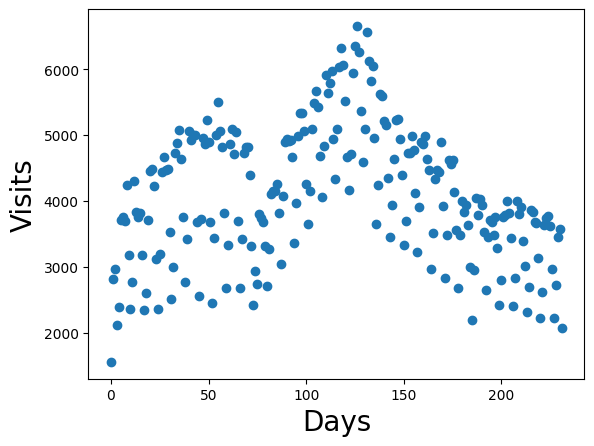

In [40]:
# Scatter plot of Date vs Visits
plt.scatter(X,y)
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Visits', fontsize = 20)
plt.show()

In [ ]:
#plotting regression line
plt.scatter(x_train, y_train, color='black', label='Actual data')
plt.plot(x_test, y_pred, color='blue', linewidth=2, label='Regression line')
plt.xlabel('Daya')
plt.ylabel('Visits')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

NameError: name 'x_train' is not defined

In [35]:
print("Length of X_train: ", len(X_train),"\n--------------------\n",
"Length of X_test: ", len(X_test),"\n--------------------\n"
,"Length of y_train: ", len(y_train),"\n--------------------\n"
,"Length of y_test: ", len(y_test),"\n--------------------\n")

Length of X_train:  185 
--------------------
 Length of X_test:  47 
--------------------
 Length of y_train:  185 
--------------------
 Length of y_test:  47 
--------------------



In [36]:
# Create a linear regression model
model = LinearRegression()

In [37]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([3952.09146496, 4145.68488264, 4217.80792061, 4014.09197128,
       4210.21602187, 3974.86716116, 4197.56285732, 3979.92842698,
       4034.33703456, 4069.76589532, 3955.88741432, 4205.15475605,
       4107.72538898, 4003.96943963, 4007.765389  , 4055.84741431,
       4044.45956621, 4191.23627504, 3941.96893331, 3995.11222444,
       4092.54159151, 4024.21450292, 3968.54057888, 4000.17349026,
       4071.03121177, 4206.42007251, 4043.19424975, 4101.3988067 ,
       4097.60285734, 4122.90918645, 3977.39779407, 4153.27678138,
       4079.88842696, 4172.25652821, 4208.95070542, 4068.50057886,
       4028.01045229, 4078.6231105 , 4125.43981936, 4046.99019912,
       4111.52133835, 3982.45905989, 4048.25551557, 4136.82766746,
       4086.21500924, 4087.48032569, 4039.39830038])

In [39]:
# Evaluate the model
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 1496618.6731444788
R-squared: -0.0059471344410282345
